In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('credit_card_data.csv')

In [0]:
df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [0]:
df.isnull().sum()

Merchant_id                       0
Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Average Amount/transaction/day  3075 non-null   float64
 2   Transaction_amount              3075 non-null   float64
 3   Is declined                     3075 non-null   object 
 4   Total Number of declines/day    3075 non-null   int64  
 5   isForeignTransaction            3075 non-null   object 
 6   isHighRiskCountry               3075 non-null   object 
 7   Daily_chargeback_avg_amt        3075 non-null   int64  
 8   6_month_avg_chbk_amt            3075 non-null   float64
 9   6-month_chbk_freq               3075 non-null   int64  
 10  isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 264.4+ KB


In [0]:
df['Is declined'].value_counts()

N    3018
Y      57
Name: Is declined, dtype: int64

In [0]:
df['isFradulent'].value_counts()

N    2627
Y     448
Name: isFradulent, dtype: int64

In [0]:
df['isForeignTransaction'].value_counts()

N    2369
Y     706
Name: isForeignTransaction, dtype: int64

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['isForeignTransaction'] = le.fit_transform(df['isForeignTransaction'])
df['Is declined'] = le.fit_transform(df['Is declined'])
df['isHighRiskCountry'] = le.fit_transform(df['isHighRiskCountry'])
df['isFradulent'] = le.fit_transform(df['isFradulent'])

In [0]:
df['isForeignTransaction'].value_counts()

0    2369
1     706
Name: isForeignTransaction, dtype: int64

In [0]:
df['isFradulent'].value_counts()

0    2627
1     448
Name: isFradulent, dtype: int64

In [0]:
df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [0]:
df.columns

Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1d4738fd0>,
      dtype=object)

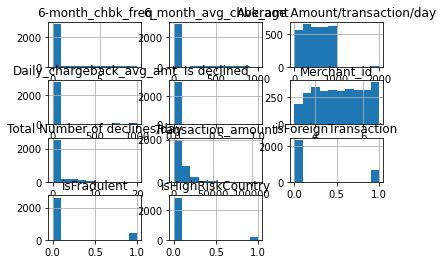

In [0]:
df.hist()

Text(0.5, 1.0, 'Target variable count')

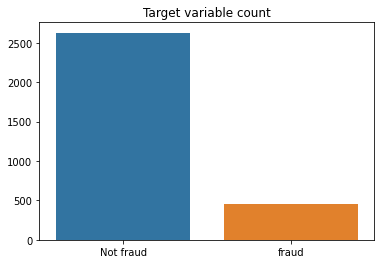

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

x=df['isFradulent'].value_counts().values
sns.barplot(['Not fraud','fraud'],x)
plt.title('Target variable count')

In [46]:
X = df.drop(['isFradulent'],axis=1)
y = df['isFradulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((2460, 10), (2460,), (615, 10), (615,))

In [47]:
X_train.columns

Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq'],
      dtype='object')

In [48]:
X.columns

Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq'],
      dtype='object')

In [0]:
#df_main = X_train
#df_main['isFradulent'] = y_train
df_new=pd.concat([X_train,y_train],axis=1)

In [50]:
df_new.head()
df_new.shape
df_new['isFradulent'].value_counts()


0    2115
1     345
Name: isFradulent, dtype: int64

In [51]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_new[df_new['isFradulent']==0]
df_minority = df_new[df_new['isFradulent']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=2115,random_state=111) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['isFradulent'].value_counts()

1    2115
0    2115
Name: isFradulent, dtype: int64

Text(0.5, 1.0, 'Target variable count')

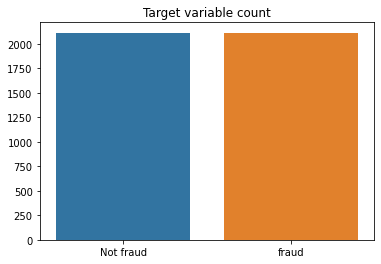

In [80]:
x=df_upsampled['isFradulent'].value_counts().values
sns.barplot(['Not fraud','fraud'],x)
#sns.scatterplot(df_upsampled['Merchant_id'],df_upsampled['isFradulent'],hue ="isFradulent")
#sns.pairplot(df_upsampled, hue ="isFradulent", palette ='coolwarm') 
plt.title('Target variable count')

In [53]:
df_upsampled.shape

(4230, 11)

In [0]:
z = df_upsampled['isFradulent']
f = z.to_numpy()

### undersampling

In [55]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_new[df_new['isFradulent']==0]
df_minority = df_new[df_new['isFradulent']==1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=345,random_state=121) 
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['isFradulent'].value_counts()

1    345
0    345
Name: isFradulent, dtype: int64

In [56]:
df_downsampled.shape

(690, 11)

Text(0.5, 1.0, 'Target variable count')

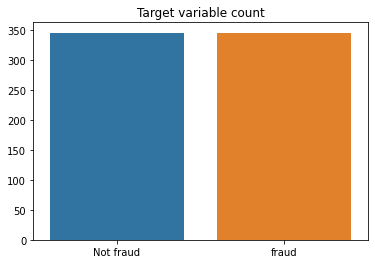

In [81]:
x=df_downsampled['isFradulent'].value_counts().values
sns.barplot(['Not fraud','fraud'],x)
plt.title('Target variable count')

In [0]:
X = df_new.drop(['isFradulent'],axis=1)
y = df_new['isFradulent']

In [59]:
X.shape,y.shape

((2460, 10), (2460,))

## SMOTE

In [60]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='auto', random_state=None,k_neighbors=3)
X_train_res, y_train_res = sm.fit_sample(X, y) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [67]:
print("After applying SMOTE, counts '1': {}".format(sum(y_train_res == 1))) 
print("After applying SMOTE, counts '0': {}".format(sum(y_train_res == 0))) 


After applying SMOTE, counts '1': 2115
After applying SMOTE, counts '0': 2115


In [70]:
print("After applying SMOTE, counts of label '1': {}".format(sum(y_tl == 1))) 
print("After applying SMOTE, counts of label '0': {}".format(sum(y_tl == 0))) 

After applying SMOTE, counts of label '1': 345
After applying SMOTE, counts of label '0': 1938


## Clustering based method

In [74]:
from imblearn.under_sampling import ClusterCentroids

cluster_centroid = ClusterCentroids(ratio={0: 300})
X_cluster, y_cluster = cluster_centroid.fit_sample(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [76]:
print("After applying cluster centroid algorithm, counts '1': {}".format(sum(y_cluster == 1))) 
print("After applying cluster centroid algorithm, counts '0': {}".format(sum(y_cluster == 0))) 

After applying cluster centroid algorithm, counts '1': 345
After applying cluster centroid algorithm, counts '0': 300


## Tomek Links

In [78]:
from imblearn.under_sampling import TomekLinks
 
tomeklinks = TomekLinks()
X_tomeklinks, y_tomeklinks = tomeklinks.fit_sample(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [79]:
print("Using tomek links, counts '1': {}".format(sum(y_tomeklinks == 1))) 
print("Using tomek links, counts '0': {}".format(sum(y_tomeklinks == 0))) 

Using tomek links, counts '1': 345
Using tomek links, counts '0': 1938
